Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


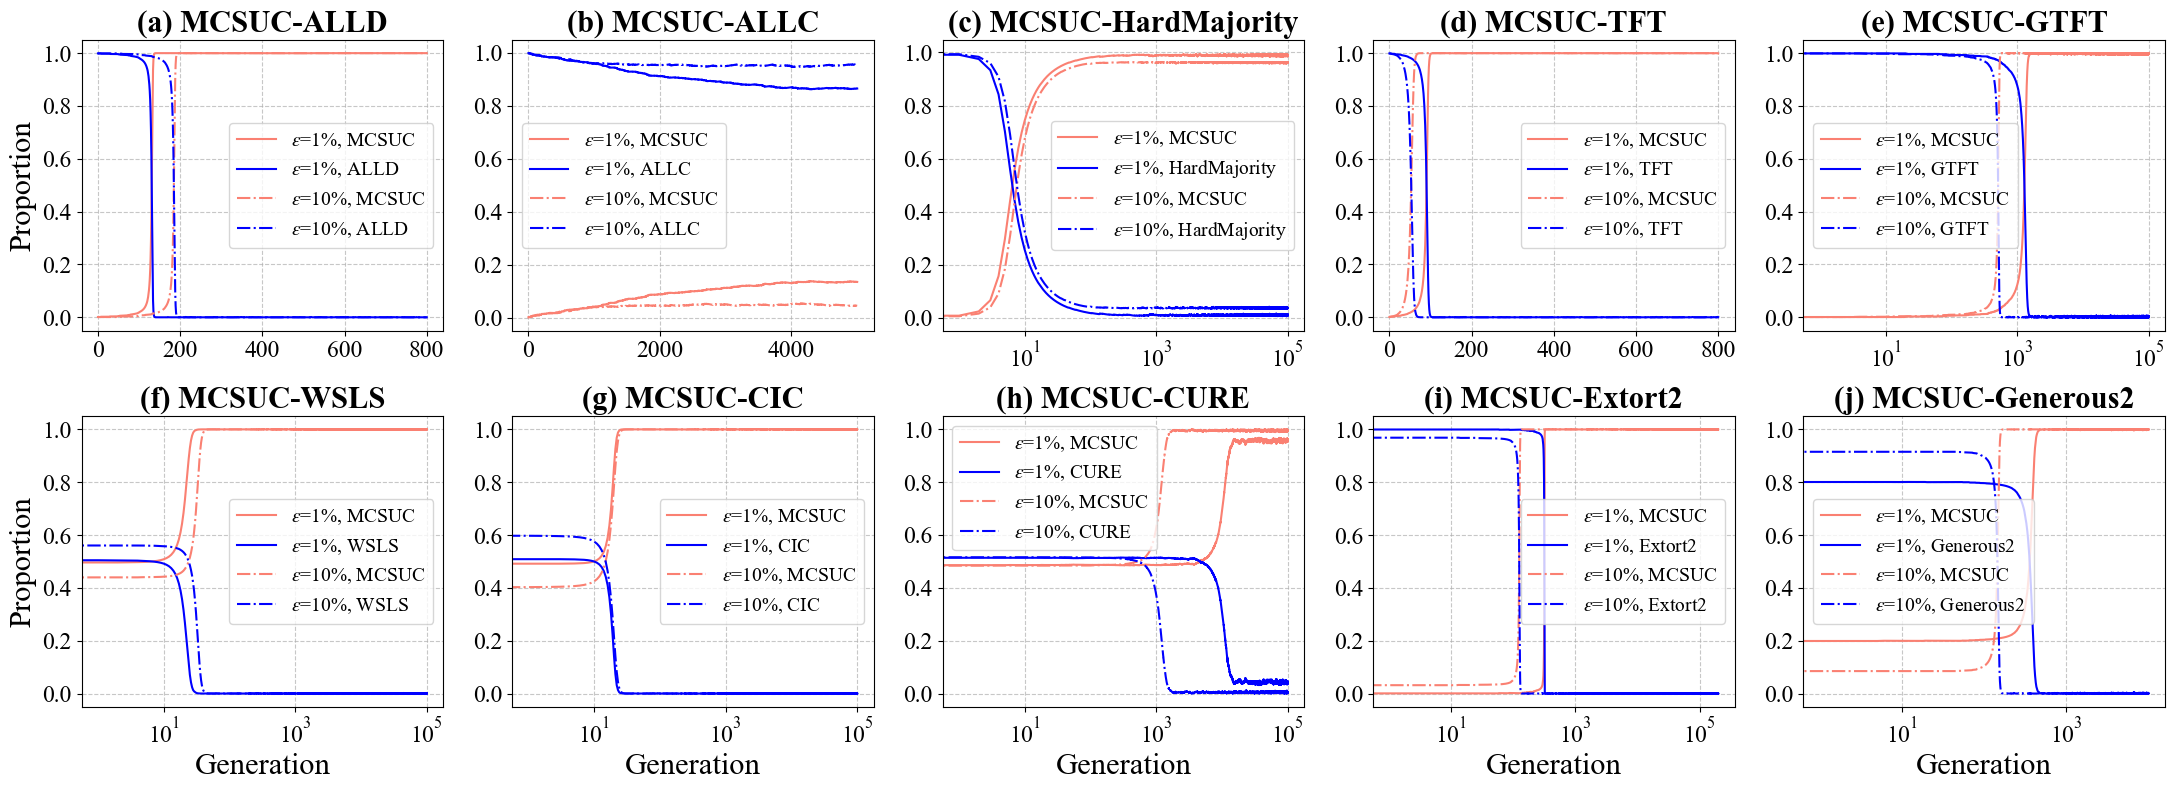

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='Times New Roman')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def plot_subplot(ax, name, step, is_log=True,  subplot_label=''):
    error01_data = np.loadtxt("./data/SH_MCSUC_vs_" + name + "_error=0.1.csv", delimiter=',')
    error001_data = np.loadtxt("./data/SH_MCSUC_vs_" + name + "_error=0.01.csv", delimiter=',')

    if name == 'CURE2':
        name = 'CURE'
    elif name == 'Generous_independent':
        name = 'Generous2'
    elif name == 'Extort2_independent':
        name = 'Extort2'

    x = [i for i in range(step + 1)]

    ax.plot(x, error001_data[:step + 1, 0], label=r"$\epsilon$=1%, MCSUC", color='salmon', linewidth=1.5)
    ax.plot(x, error001_data[:step + 1, 1], label=r"$\epsilon$=1%, " + name, color='blue', linewidth=1.5)
    ax.plot(x, error01_data[:step + 1, 0], label=r"$\epsilon$=10%, MCSUC", color='salmon', linestyle='-.', linewidth=1.5)
    ax.plot(x, error01_data[:step + 1, 1], label=r"$\epsilon$=10%, " + name, color='blue', linestyle='-.', linewidth=1.5)

    if is_log:
        ax.set_xscale('log')
    ax.set_xlabel("Generation", fontsize=22)
    ax.set_ylabel("Proportion", fontsize=22)
    ax.tick_params(axis='both', which='major', labelsize=17)

    if subplot_label in ['(a) MCSUC-ALLD', '(c) MCSUC-HardMajority', '(d) MCSUC-TFT','(f) MCSUC-WSLS','(g) MCSUC-CIC','(i) MCSUC-Extort2']:
        ax.legend(loc='center right', prop={'size':14})
    elif subplot_label in ['(h) MCSUC-CURE']:
        ax.legend(loc='upper left', prop={'size':14})
    else:
        ax.legend(loc='center left', prop={'size':14})

    if subplot_label in ['(b) MCSUC-ALLC', '(c) MCSUC-HardMajority', '(d) MCSUC-TFT', '(e) MCSUC-GTFT', '(g) MCSUC-CIC','(h) MCSUC-CURE','(i) MCSUC-Extort2','(j) MCSUC-Generous2']:
        ax.set_ylabel('')  # remove y-label

    if subplot_label in ['(a) MCSUC-ALLD', '(b) MCSUC-ALLC', '(c) MCSUC-HardMajority', '(d) MCSUC-TFT', '(e) MCSUC-GTFT']:
        ax.set_xlabel('') 
    ax.set_title(subplot_label, fontsize=22, loc='center')
    ax.grid(True, linestyle='--', alpha=0.7)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(22, 8)) 

plot_subplot(axes[0, 0], 'ALLD', 800, is_log=False, subplot_label='(a) MCSUC-ALLD')
plot_subplot(axes[0, 1], 'ALLC', 5000, is_log=False,  subplot_label='(b) MCSUC-ALLC')
plot_subplot(axes[0, 2], 'HardMajority', 100000, is_log=True, subplot_label='(c) MCSUC-HardMajority') 
plot_subplot(axes[0, 3], 'TFT', 800, is_log=False, subplot_label='(d) MCSUC-TFT')
plot_subplot(axes[0, 4], 'GTFT', 100000, is_log=True, subplot_label='(e) MCSUC-GTFT')
plot_subplot(axes[1, 0], 'WSLS', 100000, is_log=True, subplot_label='(f) MCSUC-WSLS')
plot_subplot(axes[1, 1], 'CIC', 100000, is_log=True, subplot_label='(g) MCSUC-CIC')

plot_subplot(axes[1, 2], 'CURE2', 100000, is_log=True, subplot_label='(h) MCSUC-CURE') 
plot_subplot(axes[1, 3], 'Extort2_independent', 200000, is_log=True, subplot_label='(i) MCSUC-Extort2')
plot_subplot(axes[1, 4], 'Generous_independent', 10000, is_log=True, subplot_label='(j) MCSUC-Generous2')

plt.tight_layout()
plt.savefig('./figure/SH_different_payoffmatrix_1v1.pdf', format="pdf", bbox_inches='tight', dpi=900)
plt.show()
